## Nonsurgical

In [4]:
from pycaret.classification import *
import pandas as pd

In [5]:
# Read the file in
data = pd.read_csv("chart_nonsurgical.csv")
data = data.iloc[:, 1:]

In [6]:
full_data = pd.read_csv("imputed6.csv")
full_data = full_data.iloc[:, 1:]

In [7]:
# List of covariates
covariates = ["age.at.admit", "gcs.initial", "wbc",
              "platelet", "hematocrit", "glucose",
              "creatinine", "sodium", "potassium",
              "diabetes", "anemia", "liver.disease",
              "depressive.disorder", "intraparenchymal",
              "died.before.90.days"]

In [8]:
# Only set data to hold these covariates
control = data[covariates]
full_data = full_data[covariates]

In [9]:
s = setup(data=control, target='died.before.90.days', session_id=125)
results = compare_models()

,Description,Value
0,Session id,125
1,Target,died.before.90.days
2,Target type,Binary
3,Original data shape,"(1006, 15)"
4,Transformed data shape,"(1006, 15)"
5,Transformed train set shape,"(704, 15)"
6,Transformed test set shape,"(302, 15)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7286,0.7951,0.6602,0.7226,0.6879,0.4484,0.4519,0.0630
gbc,Gradient Boosting Classifier,0.7159,0.7732,0.6446,0.7097,0.6734,0.4226,0.4264,0.0770
rf,Random Forest Classifier,0.7144,0.7951,0.6668,0.6957,0.6796,0.4221,0.4238,0.0870
lightgbm,Light Gradient Boosting Machine,0.7103,0.7816,0.6665,0.6917,0.6747,0.4139,0.4183,0.3420
lr,Logistic Regression,0.7017,0.7420,0.6101,0.6995,0.6490,0.3916,0.3966,0.3400
ridge,Ridge Classifier,0.7017,0.7467,0.6228,0.6946,0.6537,0.3929,0.3973,0.0070
lda,Linear Discriminant Analysis,0.7017,0.7464,0.6260,0.6939,0.6550,0.3933,0.3977,0.0170
ada,Ada Boost Classifier,0.6847,0.7233,0.6130,0.6687,0.6374,0.3593,0.3625,0.0450
qda,Quadratic Discriminant Analysis,0.6648,0.7420,0.4333,0.7052,0.5292,0.2972,0.3196,0.0150
nb,Naive Bayes,0.6619,0.7285,0.4585,0.6927,0.5436,0.2955,0.3146,0.0090


In [16]:
# Create model used to calculate probability
et_model = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7465,0.8025,0.7500,0.7059,0.7273,0.4908,0.4916
1,0.7465,0.8490,0.6562,0.7500,0.7000,0.4822,0.4854
2,0.7746,0.8149,0.6250,0.8333,0.7143,0.5344,0.5495
3,0.7042,0.7768,0.6250,0.6897,0.6557,0.3976,0.3991
4,0.6429,0.6850,0.6562,0.6000,0.6269,0.2857,0.2868
5,0.7714,0.8503,0.6875,0.7857,0.7333,0.5349,0.5385
6,0.6714,0.7438,0.6250,0.6452,0.6349,0.3364,0.3365
7,0.7571,0.7891,0.7188,0.7419,0.7302,0.5095,0.5097
8,0.7286,0.7878,0.6452,0.7143,0.6780,0.4444,0.4462


In [ ]:
predicted_values = predict_model(et_model, data=full_data)
predicted_values = predicted_values["prediction_score"]

In [ ]:
predicted_values.to_csv('nonsurgical_predict_probs_reg.csv')

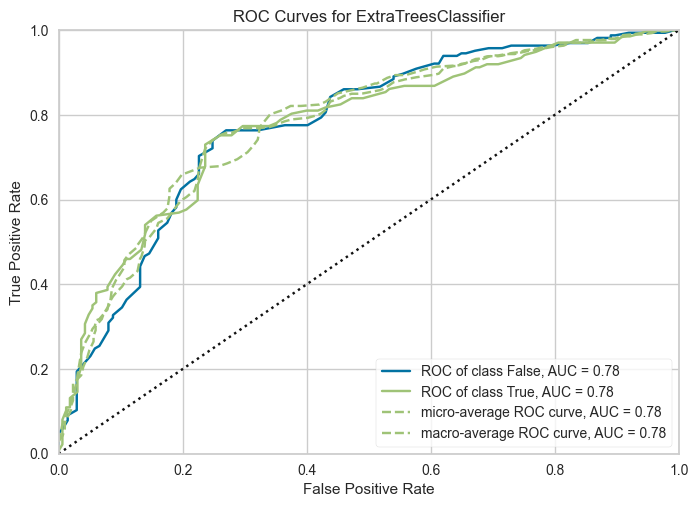

In [18]:
plot_model(et_model, plot="auc")